<a href="https://colab.research.google.com/github/Indian-otaku/Linkedin-Posts/blob/main/KMeans_Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression using KMeans Clustering Algorithm

## Method Overview

### Objective
The goal is to compress an image by reducing the number of colors using the KMeans Clustering algorithm.

### Approach
1. **KMeans Clustering:**
   - Group similar colors into 'k' clusters (e.g., k=64) in the RGB color space.
   - Each cluster centroid represents the color vector of its respective cluster.
   
2. **Data Reduction:**
   - Replace all color vectors in their respective clusters with the 'k' cluster centroids.
   - Store only the label for each pixel indicating its cluster affiliation.
   - Keep a record of the color vectors of each cluster center.

### Benefits
- Significantly reduces the data required for storage.
- Preserves the essential features of the image with fewer color representations.


# Practical Demonstration

In [ ]:
# Import necessary modules

import cv2
import matplotlib.pyplot as plt

import requests
import io
from PIL import Image

import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Setting random seed for reproducibility
np.random.seed(39)

## Get the image

In [ ]:
# Get the image from random google image link
response = requests.get("https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=pexels-pixabay-326900.jpg&fm=jpg")
image = Image.open(io.BytesIO(response.content))

# Convert PIL image to numpy array
image = np.array(image)

# Check the shape of the image
image.shape

(1333, 2000, 3)

In [ ]:
# Reshape the image

w = 1000
h = 1000
image = cv2.resize(image, (w, h))
image.shape

(1000, 1000, 3)

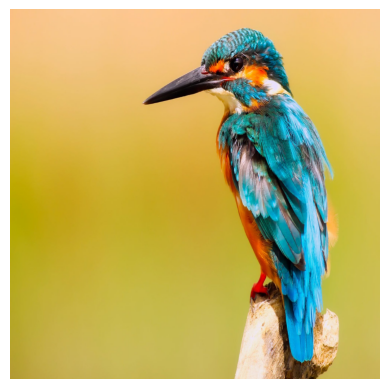

In [ ]:
# Visualize the image

plt.imshow(image)
plt.axis(False)
plt.show()

## Prepare data and pass into KMeans to get the cluster centers.

In [ ]:
# Now let's flatten the image to pass into KMeans clustering algorithm

reshaped_image = image.reshape(w*h, 3)
reshaped_image.shape

(1000000, 3)

In [ ]:
# Taking a sample of image pixels is enough

random_indices = np.random.randint(0, w*h, size=5000)
image_sample = reshaped_image[random_indices]
image_sample.shape

(5000, 3)

In [ ]:
# Using KMeans with k=10 or some arbitrary value we can find the cluster centers

kmeans = KMeans(n_clusters=10, random_state=39, n_init="auto")
kmeans.fit(image_sample)

KMeans(n_clusters=10, n_init='auto', random_state=39)

[[229.58764608 189.3572621   97.11185309]
 [ 35.9197861   32.3315508   27.        ]
 [124.30337079 176.66292135 190.23595506]
 [ 16.19895288 159.37696335 194.72251309]
 [232.02758621 218.46896552 207.31724138]
 [197.29206963 169.12572534  37.36847195]
 [157.17391304  68.89565217  19.83478261]
 [243.7426557  195.90951821 131.81081081]
 [201.67713904 182.59425134  74.05213904]
 [ 41.0245098  101.42647059 107.75490196]]

Colors found by kmeans: 


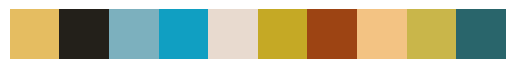

In [ ]:
# Visualize the cluster centers (colors) found by kmeans

c_centers = kmeans.cluster_centers_
print(c_centers, end="\n\n")
c_centers = c_centers.astype(int)

print("Colors found by kmeans: ")
plt.imshow(c_centers.reshape(1, -1, 3))
plt.axis(False)
plt.show()

In [ ]:
kmeans.inertia_

3137888.5524593377

## Using cluster centers for getting the compressed image.

In [ ]:
# Predict the reduced image

reduced_image = c_centers[kmeans.predict(image.reshape(w*h, 3))].reshape(w, h, 3)
reduced_image.shape

(1000, 1000, 3)

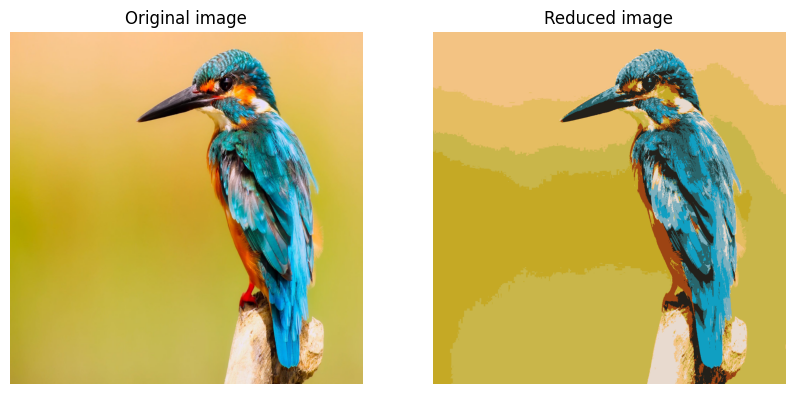

In [ ]:
# Visualize original image with reduced image

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(reduced_image)
plt.title("Reduced image")
plt.axis(False)
plt.show()